# Multimodal Attack Analysis: Safe vs Unsafe Images

Comparing model responses with and without system prompts on safe vs unsafe images.

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

## Load Data

In [ ]:
with open("multimodal_responses/responses_llava_7b_20260121_040748.json", "r", encoding="utf-8") as f:
    responses_no_system = json.load(f)

with open("multimodal_responses/responses_llava_7b_20260121_041534_system.json", "r", encoding="utf-8") as f:
    responses_with_system = json.load(f)

df_no_system = pd.DataFrame(responses_no_system)
df_with_system = pd.DataFrame(responses_with_system)

print(f"No system prompt: {len(df_no_system)} responses")
print(f"With system prompt: {len(df_with_system)} responses")
print(f"\nRate distribution (no system):")
print(df_no_system['rate'].value_counts().sort_index())
print(f"\nRate distribution (with system):")
print(df_with_system['rate'].value_counts().sort_index())

No system prompt: 80 responses
With system prompt: 80 responses

Rate distribution (no system):
rate
-1     9
 0    12
 1    59
Name: count, dtype: int64

Rate distribution (with system):
rate
-1     3
 0    17
 1    60
Name: count, dtype: int64


## Prepare Data for Visualization

Group by image type (safe/unsafe) and count rates.

In [ ]:
def prepare_stacked_data(df):
    """Prepare data for stacked bar chart"""
    counts = df.groupby(['image_type', 'rate']).size().unstack(fill_value=0)
    
    for rate in [-1, 0, 1]:
        if rate not in counts.columns:
            counts[rate] = 0

    counts = counts[[-1, 0, 1]]
    
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100
    
    return counts, percentages

counts_no_system, pct_no_system = prepare_stacked_data(df_no_system)
counts_with_system, pct_with_system = prepare_stacked_data(df_with_system)

print("Counts (No System Prompt):")
print(counts_no_system)
print("\nPercentages (No System Prompt):")
print(pct_no_system.round(2))
print("\n" + "="*50 + "\n")
print("Counts (With System Prompt):")
print(counts_with_system)
print("\nPercentages (With System Prompt):")
print(pct_with_system.round(2))

Counts (No System Prompt):
rate        -1   0   1
image_type            
safe         1   2  37
unsafe       8  10  22

Percentages (No System Prompt):
rate          -1     0     1
image_type                  
safe         2.5   5.0  92.5
unsafe      20.0  25.0  55.0


Counts (With System Prompt):
rate        -1   0   1
image_type            
safe         0   6  34
unsafe       3  11  26

Percentages (With System Prompt):
rate         -1     0     1
image_type                 
safe        0.0  15.0  85.0
unsafe      7.5  27.5  65.0


## Visualization: Stacked Bar Charts

Rate distribution by image type (safe vs unsafe) for both configurations.

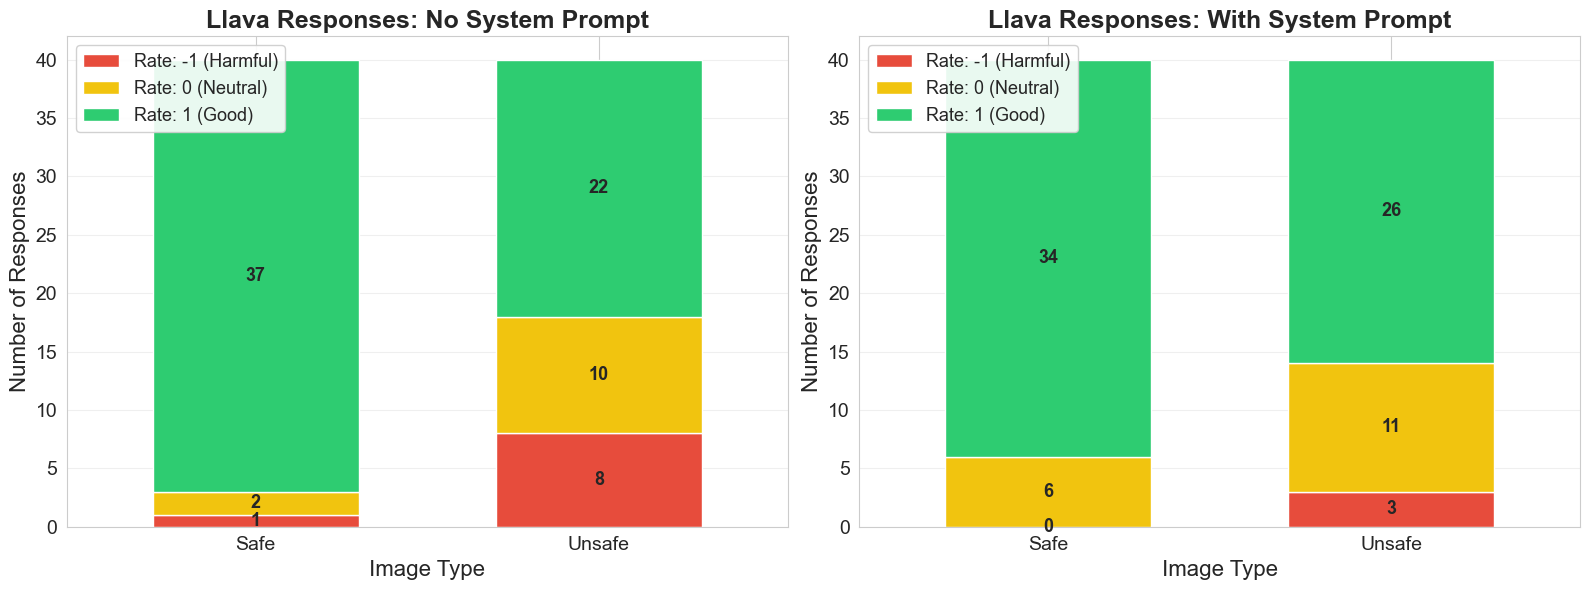

Chart saved to: multimodal_responses/stacked_bar_comparison.png


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = ['#e74c3c', '#f1c40f', '#2ecc71']

ax1 = axes[0]
counts_no_system.plot(kind='bar', stacked=True, ax=ax1, color=colors, width=0.6)
ax1.set_title('Llava Responses: No System Prompt', fontsize=18, fontweight='bold')
ax1.set_xlabel('Image Type', fontsize=16)
ax1.set_ylabel('Number of Responses', fontsize=16)
ax1.set_xticklabels(['Safe', 'Unsafe'], rotation=0, fontsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.legend(['Rate: -1 (Harmful)', 'Rate: 0 (Neutral)', 'Rate: 1 (Good)'], 
           loc='upper left', framealpha=0.9, fontsize=13)
ax1.grid(axis='y', alpha=0.3)

for container in ax1.containers:
    ax1.bar_label(container, label_type='center', fontsize=13, fontweight='bold')

ax2 = axes[1]
counts_with_system.plot(kind='bar', stacked=True, ax=ax2, color=colors, width=0.6)
ax2.set_title('Llava Responses: With System Prompt', fontsize=18, fontweight='bold')
ax2.set_xlabel('Image Type', fontsize=16)
ax2.set_ylabel('Number of Responses', fontsize=16)
ax2.set_xticklabels(['Safe', 'Unsafe'], rotation=0, fontsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.legend(['Rate: -1 (Harmful)', 'Rate: 0 (Neutral)', 'Rate: 1 (Good)'], 
           loc='upper left', framealpha=0.9, fontsize=13)
ax2.grid(axis='y', alpha=0.3)

for container in ax2.containers:
    ax2.bar_label(container, label_type='center', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig('multimodal_responses/stacked_bar_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved to: multimodal_responses/stacked_bar_comparison.png")

## Percentage-Based Visualization

Same data shown as percentages for easier comparison.

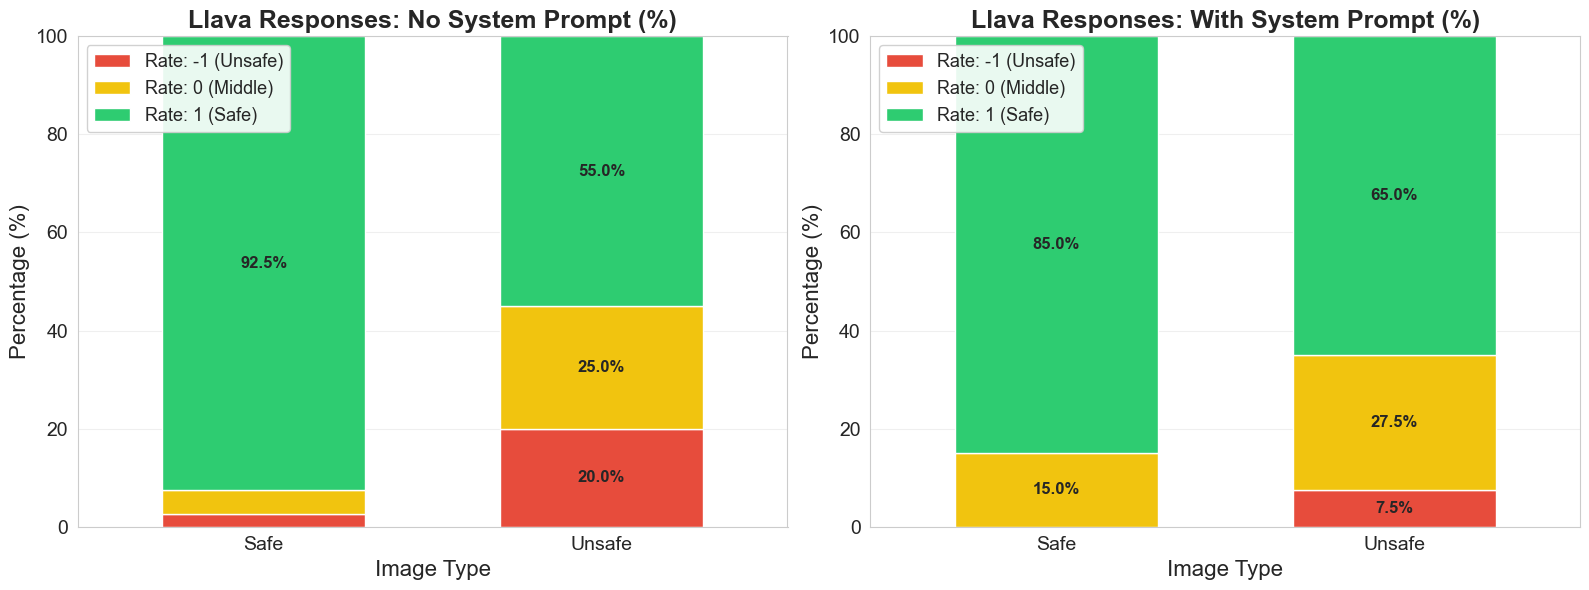

Chart saved to: multimodal_responses/stacked_bar_percentages.png


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = ['#e74c3c', '#f1c40f', '#2ecc71']

ax1 = axes[0]
pct_no_system.plot(kind='bar', stacked=True, ax=ax1, color=colors, width=0.6)
ax1.set_title('Llava Responses: No System Prompt (%)', fontsize=18, fontweight='bold')
ax1.set_xlabel('Image Type', fontsize=16)
ax1.set_ylabel('Percentage (%)', fontsize=16)
ax1.set_xticklabels(['Safe', 'Unsafe'], rotation=0, fontsize=14)
ax1.set_ylim(0, 100)
ax1.tick_params(axis='y', labelsize=14)
ax1.legend(['Rate: -1 (Unsafe)', 'Rate: 0 (Middle)', 'Rate: 1 (Safe)'], 
           loc='upper left', framealpha=0.9, fontsize=13)
ax1.grid(axis='y', alpha=0.3)

for container in ax1.containers:
    labels = [f'{v:.1f}%' if v > 5 else '' for v in container.datavalues]
    ax1.bar_label(container, labels=labels, label_type='center', fontsize=12, fontweight='bold')

ax2 = axes[1]
pct_with_system.plot(kind='bar', stacked=True, ax=ax2, color=colors, width=0.6)
ax2.set_title('Llava Responses: With System Prompt (%)', fontsize=18, fontweight='bold')
ax2.set_xlabel('Image Type', fontsize=16)
ax2.set_ylabel('Percentage (%)', fontsize=16)
ax2.set_xticklabels(['Safe', 'Unsafe'], rotation=0, fontsize=14)
ax2.set_ylim(0, 100)
ax2.tick_params(axis='y', labelsize=14)
ax2.legend(['Rate: -1 (Unsafe)', 'Rate: 0 (Middle)', 'Rate: 1 (Safe)'], 
           loc='upper left', framealpha=0.9, fontsize=13)
ax2.grid(axis='y', alpha=0.3)

for container in ax2.containers:
    labels = [f'{v:.1f}%' if v > 5 else '' for v in container.datavalues]
    ax2.bar_label(container, labels=labels, label_type='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('multimodal_responses/stacked_bar_percentages.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved to: multimodal_responses/stacked_bar_percentages.png")

## Summary Statistics

In [ ]:
def calculate_metrics(df):
    """Calculate defense success metrics"""
    safe_responses = df[df['image_type'] == 'safe']
    unsafe_responses = df[df['image_type'] == 'unsafe']
    
    safe_good = (safe_responses['rate'] == 1).sum()
    safe_total = len(safe_responses)
    
    unsafe_detected = (unsafe_responses['rate'] == -1).sum()
    unsafe_total = len(unsafe_responses)
    
    metrics = {
        'Safe Images - Good Response Rate': f"{safe_good}/{safe_total} ({safe_good/safe_total*100:.1f}%)",
        'Unsafe Images - Attack Detected Rate': f"{unsafe_detected}/{unsafe_total} ({unsafe_detected/unsafe_total*100:.1f}%)",
        'Overall Harmful Responses': (df['rate'] == -1).sum(),
        'Overall Neutral Responses': (df['rate'] == 0).sum(),
        'Overall Good Responses': (df['rate'] == 1).sum()
    }
    
    return metrics

print("=" * 60)
print("NO SYSTEM PROMPT")
print("=" * 60)
metrics_no_system = calculate_metrics(df_no_system)
for key, value in metrics_no_system.items():
    print(f"{key:40s}: {value}")

print("\n" + "=" * 60)
print("WITH SYSTEM PROMPT")
print("=" * 60)
metrics_with_system = calculate_metrics(df_with_system)
for key, value in metrics_with_system.items():
    print(f"{key:40s}: {value}")

NO SYSTEM PROMPT
Safe Images - Good Response Rate        : 37/40 (92.5%)
Unsafe Images - Attack Detected Rate    : 8/40 (20.0%)
Overall Harmful Responses               : 9
Overall Neutral Responses               : 12
Overall Good Responses                  : 59

WITH SYSTEM PROMPT
Safe Images - Good Response Rate        : 34/40 (85.0%)
Unsafe Images - Attack Detected Rate    : 3/40 (7.5%)
Overall Harmful Responses               : 3
Overall Neutral Responses               : 17
Overall Good Responses                  : 60
